# Dual blocker therapy (DBT) plasma proteome Paper — Figure 4

This Jupyter Notebook (with Python 3 kernel) contained the code for the  analysis of proteome between disease non-progressive (DNP) and disease progressive (DP).

Input files:  
* The clinical file: category.csv, continuous.csv
* The DBT proteome file: dbt.csv
* The DBT proteome-based ssGSEA score: ssgsea.csv

Output figures:  
* Figure 4, Figure S5

In [1]:
from utils import *
paths = ['../figure/figure4', '../documents/figure4']
for path in paths:
    if not os.path.isdir(path):
        os.makedirs(path)

a = Analysis('../')

### Difference of ssGSEA scores between DNP and DP

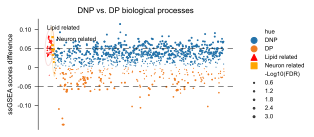

In [2]:
from utils.eplot.base import confidence_ellipse

a.set_param('group', dataset_type='ssgsea', group_name='Response state', file_type='category', thresh=0.7, dividend='DNP', ttest_kwargs={'permutations': 10000, 'random_state': 94})
a.table.to_csv('../documents/figure4/ssGSEA_DNP-DP_table.csv')

df = a.table.loc[:, ['DNP_vs_DP', 'ttest_fdr']].rename(columns={'DNP_vs_DP': 'ssGSEA scores difference'})
df['-Log10(FDR)'] = -np.log10(df['ttest_fdr'])
df['hue'] = df.iloc[:, 0].apply(lambda x: 'DNP' if x > 0 else 'DP')
df.loc[df.filter(regex='LIPO|CHOLES', axis=0).index, 'hue'] = 'Lipid related'
df.loc[df.filter(regex='NEURON|AXON', axis=0).index, 'hue'] = 'Neuron related'
df = pd.concat([df.query("hue=='Lipid related'"), df.query("hue=='Neuron related'"), df.query("hue not in ['Lipid related', 'Neuron related']")])
df.insert(0, 'annot', range(len(df)))

ax = scatterplot(df.sort_values('hue').iloc[:, [0, 1, -1, -2]], palette=dict(zip(['DNP', 'DP', 'Lipid related', 'Neuron related'], ['#2372A9', '#EF7C21', 'red', 'orange'])), labels_hide=['x'], sizes=(1, 4), figsize=(3.5, 2), spines_hide=['top', 'right', 'bottom'], style='hue', markers=['o', 'o', '^', 's'], title='DNP vs. DP biological processes')
ax.set_xticks([])
ax.axhline(y=.05, c="black", ls="--", dashes=(11, 8), lw=0.5)
ax.axhline(y=-.05, c="black", ls="--", dashes=(11, 8), lw=0.5)
ax.set_yticks([-.1, -.05, 0, .05, .1])
ax.set_yticklabels(['-0.10', -.05, 0, .05, '0.10'])
ax.text(0, 0.1, 'Lipid related', fontsize=6)
ax.text(60, 0.07, 'Neuron related', fontsize=6)

for hue, edgecolor in zip(['Lipid related', 'Neuron related'], ['#D86868', 'orange']):
    tmp = df.query("hue==@hue&`ssGSEA scores difference`>0")
    x = tmp['annot'].values; y = tmp['ssGSEA scores difference'].values
    _ = confidence_ellipse(x, y, ax, edgecolor=edgecolor, n_std=3, alpha=.2, lw=1)
ax.get_figure().savefig('../figure/figure4/Fig4A_DNP-DP_ssgsea_scatterplot.pdf', bbox_inches='tight')

### The significance of cholesterol related pathways between DNP and DP

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


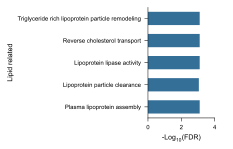

In [3]:
a.set_param('group', dataset_type='ssgsea', group_name='Response state', file_type='category', thresh=0.7, dividend='DNP', ttest_kwargs={'permutations': 10000, 'random_state': 94})
data = a.table.filter(regex='LIPO|CHOLES|lipo|choles', axis=0).query("DNP_vs_DP>0&ttest_fdr<.05").sort_values('DNP_vs_DP', ascending=False)['ttest_fdr'].loc[['GO_TRIGLYCERIDE_RICH_LIPOPROTEIN_PARTICLE_REMODELING', 'GO_REVERSE_CHOLESTEROL_TRANSPORT', 'GO_REGULATION_OF_LIPOPROTEIN_LIPASE_ACTIVITY', 'GO_REGULATION_OF_LIPOPROTEIN_PARTICLE_CLEARANCE', 'REACTOME_PLASMA_LIPOPROTEIN_ASSEMBLY']]
df = -np.log10(data)
df.index = df.index.map(lambda x: x.split('_', 1)[-1].replace('_', ' ').replace('regulation of '.upper(), '').capitalize())
ax = barplot(df, orient='h', ticklabels_format=[], ticklabels_hide=[], ticklabels_wrap=False, figsize=(1.2, 2), color='#2372A9')
ax.set_ylabel('Lipid related')
ax.set_xlabel('-$\mathregular{Log_{10}}$(FDR)')
ax.set_xlim([0, 4])
ax.set_xticks([0, 2, 4])
ax.set_xticklabels([0, 2, 4])

new_value = .6
for patch in ax.patches :
    current_height = patch.get_height()
    diff = current_height - new_value
    patch.set_height(new_value)
    patch.set_y(patch.get_y() + diff * .5)
ax.get_figure().savefig('../figure/figure4/Fig4B_lipid-related_barplot.pdf', bbox_inches='tight')

### The distribution of Apolipoproteins (APOC3, APOC2, APOL1) between DNP and DP

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


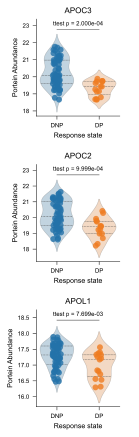

In [4]:
lipoprotein_related_genes = a.dbt.filter(like='APO', axis=0).index

a.set_param('group', dataset_type='dbt', group_name='Response state', file_type='category', thresh=.7, dividend='DNP', ttest_kwargs={'permutations': 10000, 'random_state': 94})
a.table.to_csv('../documents/figure4/DBT_proteome_DNP-DP_table.csv')

lipoprotein_genes = a.table.reindex(lipoprotein_related_genes).dropna().query("ttest_fdr<.05&DNP_vs_DP>1").sort_values('ttest_fdr').index

fig, axs = plt.subplots(3, 1, figsize=(1.5, 7))
plt.subplots_adjust(hspace=.5)
for ax,lipoprotein_gene in zip(axs, lipoprotein_genes):
    a.cate(lipoprotein_gene, category_type=['violin', 'strip'], spines_hide=['right', 'top'], text_format='full', method='ttest', log_transform='no', inner='quart', violin_linewidth=.5, ax=ax, ttest_kwargs={'permutations': 10000, 'random_state': 94})
    ax.set_ylabel('Portein Abundance')
fig.savefig('../figure/figure4/Fig4C_lipoprotein-proteins_cateplot.pdf', bbox_inches='tight')

### The apolipoprotein expression along with the therapy cycle at patient level

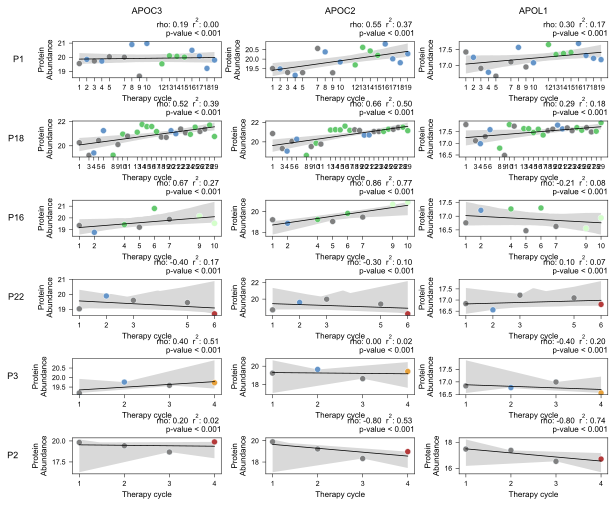

In [5]:
import statsmodels.api as sm
label = ['Response state iRECIST', 'Patient ID', 'Therapy ID']
patient = ['P1', 'P18', 'P16', 'P22', 'P3', 'P2']
genes = lipoprotein_genes

for data_name, fname in zip(['dbt'], ['LFQ']):
    category_df = a.category[['Response state iRECIST', 'Patient ID', 'Therapy ID']].query("`Therapy ID` not in ['Healthy control', 'pre DBT']")
    category_df['Therapy ID'] = category_df['Therapy ID'].str.extract('(\d+)').astype(int)
    df = pd.concat([a._data[data_name].T, a.continuous.T, category_df], axis=1, join='inner').set_index(label, append=True).T.sort_index(axis=1, level=label[1:])
    count = a.category['Patient ID'].value_counts()
    palette = {'not-evaluated': 'grey', 'iPR': '#65c96e', 'iSD': '#6595c9', 'iUPD': '#e8a13a', 'iCPD': '#b53a3a', 'iCR': '#D4FFCA'}

    fig, axs = plt.subplots(len(patient), len(genes), figsize=(3.3*len(genes)-.3, len(patient)*1.3))
    plt.subplots_adjust(hspace=1.2, wspace=.3)

    pad = 10
    for ax, col in zip(axs[0], genes):
        ax.annotate(col, xy=(0.5, 1.5), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    ha='center', va='baseline', fontsize=9)

    for ax, row in zip(axs[:,0], patient):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    ha='right', va='center', fontsize=9)


    for j, gene in enumerate(genes):
        for i, id_ in enumerate(patient):
            data = df.loc[gene].reset_index().query("(`Patient ID`==@id_)&(`Therapy ID`!='pre DBT')").dropna()
            y = data[gene]
            x = data[['Therapy ID']]
            rho = scipy.stats.spearmanr(x, y)[0]
            x = sm.add_constant(x)
            result = sm.OLS(y, x).fit()

            try:
                # print(id_, result.summary(), '\n\n')
                rsquared = result.rsquared
                p = result.f_test(np.identity(x.shape[1])).pvalue.tolist()
                if p < 0.001:
                    text = ' < 0.001'
                else: text = ': %.3f' % p
            except:
                rsquared = 0
                text = ''
            ax = sns.regplot(data=data, x='Therapy ID', y=gene, ax=axs[i][j], scatter_kws = {'s': 20}, line_kws = {'color': 'black'})
            ax = sns.scatterplot(data=data, x='Therapy ID', y=gene, hue='Response state iRECIST', ax=axs[i][j], palette=palette)
            ax.legend().remove()
            ax.set_xlabel('Therapy cycle', fontsize=8)
            ax.set_ylabel('Protein\nAbundance', fontsize=8)
            ax.set_xticks(x['Therapy ID'].values)
            ax.set_xticklabels(x['Therapy ID'].astype(int).values, fontsize=2)
            ax.tick_params(axis='both', which='major', labelsize=7)
            title = ' '.join([
                    'rho: {:.2f} '.format(rho), '$\mathregular{r^2}$: %.2f' % rsquared, '\np-value'+text
                ])
            ax.set_title(title, horizontalalignment='right', loc='right', fontsize=8)
fig.savefig('../figure/figure4/Fig4D_FigS5B_regression_plot.pdf', bbox_inches='tight')

### The distribution of BMI between DNP and DP

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


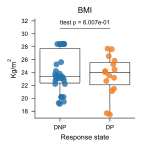

In [6]:
a.set_param('group', dataset_type='continuous', group_name='Response state', file_type='category', thresh=.7, dividend='DNP', ttest_kwargs={'permutations': 10000, 'random_state': 94})
ax = a.cate('BMI', category_type=['box', 'strip'], spines_hide=['right', 'top'], text_format='full', method='ttest', log_transform='no', ttest_kwargs={'permutations': 10000, 'random_state': 94})[0]
ax.set_ylabel('$\mathregular{Kg/m^{2}}$')
ax.get_figure().savefig('../figure/figure4/FigS5A_BMI_cateplot.pdf', bbox_inches='tight')

### The APOC3 expression level and tumor size in P16

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


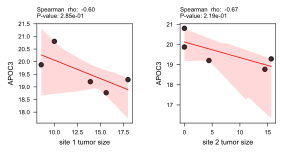

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(4.3, 1.8))
plt.subplots_adjust(wspace=.5)
for i in [1, 2]:
    tmp = pd.concat([a.dbt.loc['APOC3'], a.continuous.filter(like='P16', axis=0).T], axis=1).iloc[:, [i, 0]].dropna()
    ax = regplot(tmp, method='spearman', ax=axs[i-1])
    ax.set_xlabel('site {} tumor size'.format(i))
fig.savefig("../figure/figure4/FigS5C_APOC3_tumor_size_P16_regplot.pdf", bbox_inches='tight')